# Classifying iris dataset using Logistic Regression

classification of iris dataset into Setosa, Versicolour, and Virginica based on the features such as Sepal Length, Sepal Width, Petal Length and Petal Width


In [30]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [12]:
# loading the dataset
df= load_iris()
print(df)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

from the dataset we can see that it has two values: data and target
data contains Sepal Length, Sepal Width, Petal Length and Petal Width
target contains 0, 1, 2 where 0 is for setosa, 1 is for versicolor and 2 is for virginica

In [14]:
#splitting the data and target values
X= df.data
y=df.target

In [15]:
# splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [21]:
# standardizing
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [22]:
#loading X_train_new into classifier
model=LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)


LogisticRegression(max_iter=1000)

In [24]:
# prediction
y_predict=model.predict(X_test_new)
print(y_predict)

[0 1 0 2 0 0 1 2 2 0 1 2 0 1 2 1 1 2 1 2 2 1 0 0 2 0 2 2 1 0]


In [28]:
# accuracy, precision, recall anf f1
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9666666666666667
Precision: 0.9703703703703703
Recall: 0.9666666666666667
F1 Score: 0.96692242114237


# visualization of metric scores for each type of iris flower: 

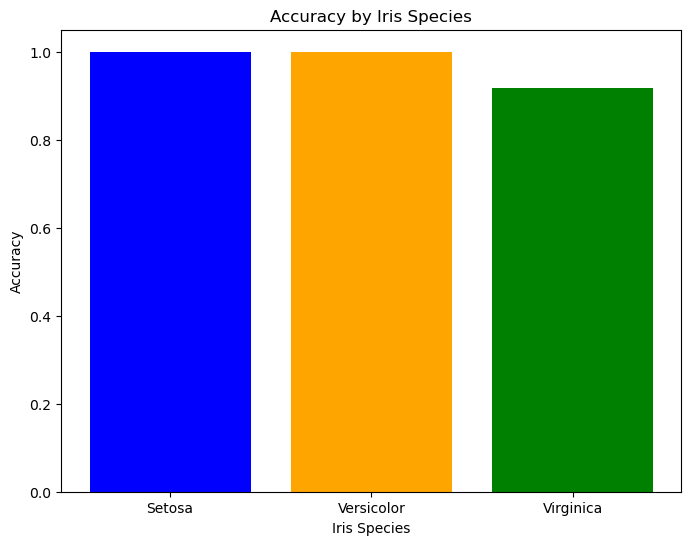

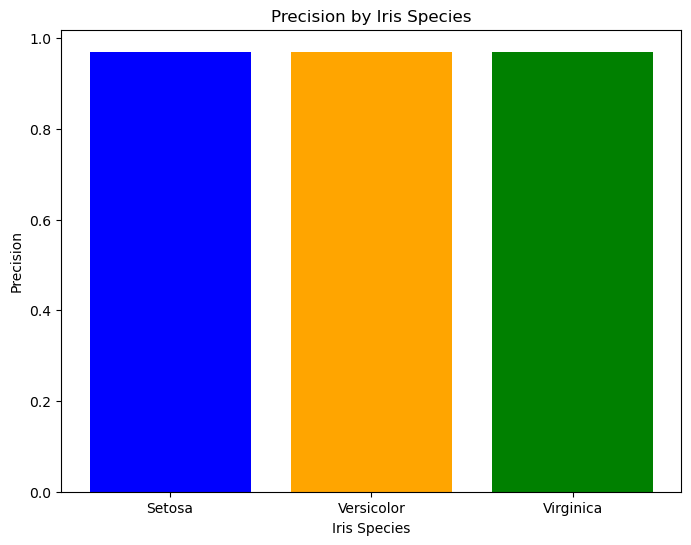

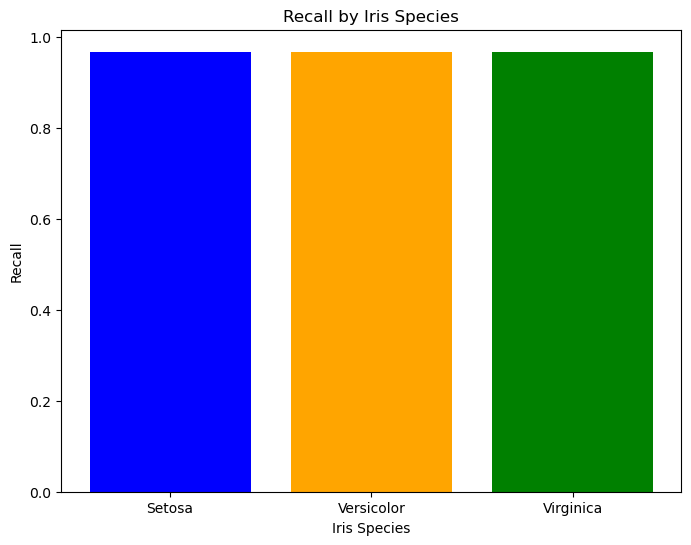

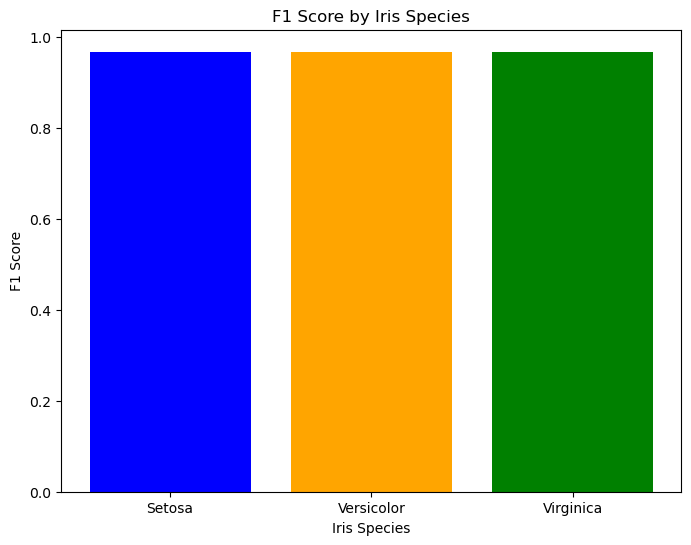

In [35]:
def plot_metric(metric, metric_name):
    plt.figure(figsize=(8, 6))
    plt.bar(labels, metric, color=['blue', 'orange', 'green'])
    plt.title(f'{metric_name} by Iris Species')
    plt.xlabel('Iris Species')
    plt.ylabel(metric_name)
    plt.show()

# Plot accuracy for each class
plot_metric([accuracy_score(y_test[y_test==i], y_predict[y_test==i]) for i in range(3)], 'Accuracy')

# Plot precision for each class
plot_metric(precision, 'Precision')

# Plot recall for each class
plot_metric(recall, 'Recall')

# Plot F1 score for each class
plot_metric(f1, 'F1 Score')